In [2]:
from bs4 import BeautifulSoup as bs
import requests 
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sq3

In [3]:
# Change display cells

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 1000 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 1000 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 1000 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

# Playlist RNS

In [3]:
# Request for scrap whole playlist rns

url = "https://nowyswiat.online/playlista"

#choose dates
start_date='2020-07-10'
end_date='2023-05-02'
daterange = pd.date_range(start_date, end_date)

In [4]:
playlist_infolist=[]

for single_date in daterange:
	payload = "csrf_neocms=cb1e12014744c58caf830b6af495c9fe&date={}&time_range=Wszystkie".format(single_date.strftime("%Y-%m-%d"))
	headers = {
	'authority': 'nowyswiat.online',
	'accept': '*/*',
	'accept-language': 'pl-PL,pl;q=0.9,en-US;q=0.8,en;q=0.7',
	'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
	'cookie': '_ga=GA1.1.829566658.1625149790; cookie-accept=yes; rns_remauth_token=556e7c19caa5e0a39962b21cad8a691f%2444da40de15659c3929e11d283c66f84c7.63a5d84995764582cb7a1cda3d55db27; videoIframeSrc=undefined; csrf_cookie_neocms=cb1e12014744c58caf830b6af495c9fe; videoPlayerMode=minimized; cisession=0148d39b092ce803e87b065077f35a459f64c35d; _ga_LKW0EDCNCH=GS1.1.1680979192.137.1.1680979784.0.0.0; PHPSESSID=25f9fc32a116f69f94654c028deb6895; cisession=0148d39b092ce803e87b065077f35a459f64c35d; csrf_cookie_neocms=e4c7f53722b7d8c0dd27a0d14bdb2c93',
	'origin': 'https://nowyswiat.online',
	'referer': 'https://nowyswiat.online/playlista',
	'sec-ch-ua': '"Google Chrome";v="111", "Not(A:Brand";v="8", "Chromium";v="111"',
	'sec-ch-ua-mobile': '?0',
	'sec-ch-ua-platform': '"Windows"',
	'sec-fetch-dest': 'empty',
	'sec-fetch-mode': 'cors',
	'sec-fetch-site': 'same-origin',
	'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
	'x-requested-with': 'XMLHttpRequest'
		}

	r = requests.request("POST", url, headers=headers, data=payload)
	soup = bs(r.content,'html.parser')  
	
	title=soup.find('h2', {'class': 'rns-vote-title'}).string
	artist=soup.find('div', {'class': 'rns-vote-names'}).string
	time=soup.find('div', {'class': 'rns-switcher-time rns-switcher-time-small'}).string

	list_title=soup.find_all('h2', {'class': 'rns-vote-title'})
	list_artist=soup.find_all('div', {'class': 'rns-vote-names'})
	list_time=soup.find_all('div', {'class': 'rns-switcher-time rns-switcher-time-small'})
	for it in range(len(list_title)):
		playlist_info={}
		title = list_title[it].get_text(" ", strip=True).replace("\r\n"," ")
		artist = list_artist[it].get_text(" ", strip=True).replace("\r\n"," ")
		time=list_time[it].get_text(" ", strip=True).replace("\r\n"," ")
		playlist_info['title']=title
		playlist_info['artist']=artist
		playlist_info['time']=time
		playlist_info['date']=single_date
		playlist_infolist.append(playlist_info)

In [5]:
rnsplaylistall=pd.DataFrame(playlist_infolist)
#save to csv
#rnsplaylistall.to_csv('RNS_playlist_all.csv')


In [4]:
#read csv
rnsplaylistall= pd.read_csv("RNS_playlist_all.csv")

In [44]:
#fast check data
rnsplaylistall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254669 entries, 0 to 254668
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  254669 non-null  int64 
 1   title       254666 non-null  object
 2   artist      254597 non-null  object
 3   datetime    254669 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.8+ MB


In [6]:
rnsplaylistall.nunique()

Unnamed: 0    254669
title          70437
artist         29930
time            1426
date            1027
dtype: int64

In [7]:
rnsplaylistall.title.describe()

count               254666
unique               70437
top       Enough Is Enough
freq                   283
Name: title, dtype: object

In [8]:
rnsplaylistall.artist.describe()

count                 254597
unique                 29930
top       The Rolling Stones
freq                     943
Name: artist, dtype: object

## Clean prepare data

In [8]:
rnsplaylistall=rnsplaylistall.drop(columns='Unnamed: 0')

In [8]:
rnsplaylistall['datetime']=pd.to_datetime(rnsplaylistall['date'] + ' ' + rnsplaylistall['time'])
rnsplaylistall

,title,artist,time,date,datetime
0,"Touch, Peel and Stand",Days of the New,23:57,2020-07-10,2020-07-10 23:57:00
1,Highwomen,The Highwomen,23:54,2020-07-10,2020-07-10 23:54:00
2,If You're Gonna Leave,Raul Midon,23:50,2020-07-10,2020-07-10 23:50:00
3,Pokaż mi język,Bisz/Radex,23:47,2020-07-10,2020-07-10 23:47:00
4,Tadpoles in a Jar,Jimmy Nail,23:43,2020-07-10,2020-07-10 23:43:00
...,...,...,...,...,...
254664,Good Grief,Foo Fighters,00:13,2023-05-02,2023-05-02 00:13:00
254665,Lifted,Trombone Shorty,00:10,2023-05-02,2023-05-02 00:10:00
254666,Danger Zone,Kenny Loggins,00:07,2023-05-02,2023-05-02 00:07:00
254667,Is This Love ('09),"Eminem, 50 Cent",00:03,2023-05-02,2023-05-02 00:03:00


In [9]:
rnsplaylistall=rnsplaylistall.drop(columns=['time','date'])

In [9]:
#rnsplaylistall.to_csv('RNS_rnsplaylist_allcleaned.csv')
rnsplaylistall= pd.read_csv("RNS_rnsplaylist_allcleaned.csv")

## Data analysis

In [11]:
top10title=rnsplaylistall.title.value_counts()
top10title.head(10)

title
Enough Is Enough    283
Hold On             196
Fever               145
Woman               144
Go                  137
Lovesong            132
Angel               128
Colors              125
Dreams              122
I Love You          122
Name: count, dtype: int64

In [12]:
top10artist=rnsplaylistall.artist.value_counts()
top10artist.head(10)

artist
The Rolling Stones    943
David Bowie           942
The Beatles           840
U2                    818
Sting                 770
The Black Keys        715
The Cure              634
Depeche Mode          621
John Mayer            611
Bruce Springsteen     601
Name: count, dtype: int64

In [19]:
top_10 = rnsplaylistall.artist.value_counts().head(10)

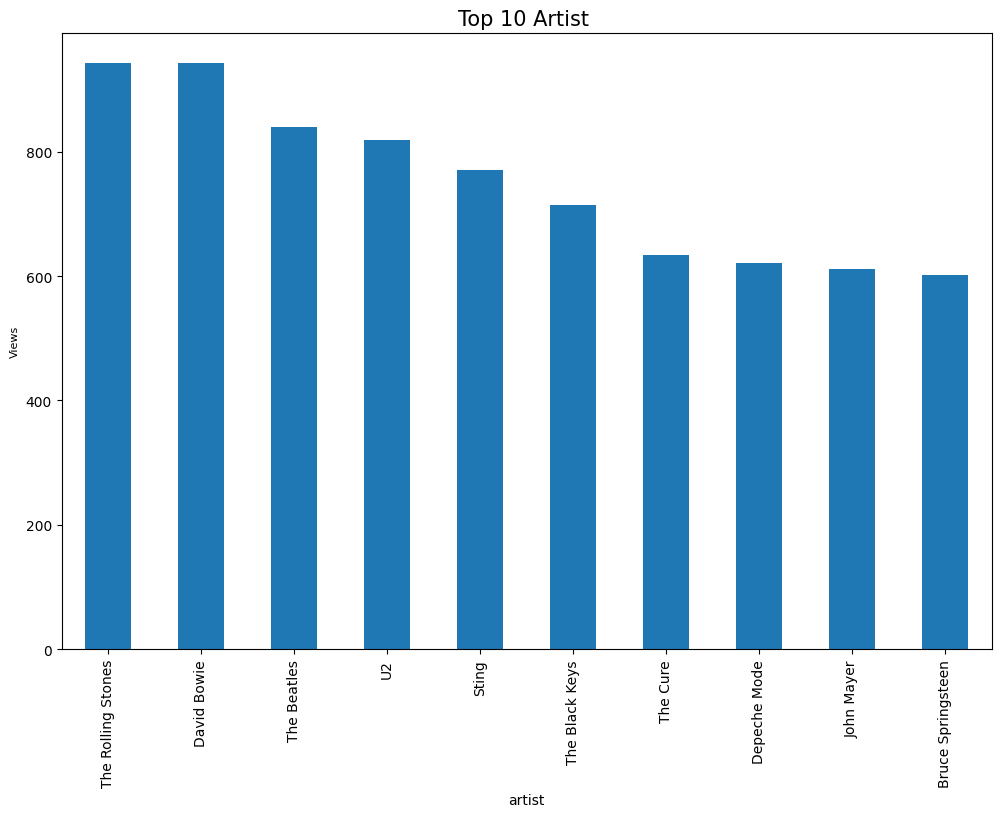

In [45]:
rnsplaylistall.artist.value_counts().head(10).plot(kind = "bar", fontsize = 10, figsize=(12,8))
plt.title("Top 10 Artist ", fontsize = 15)
plt.ylabel("Views", fontsize = 8)
plt.show()

In [25]:
rnsplaylist10=rnsplaylistall[rnsplaylistall.artist.isin(top_10.index)]
rnsplaylist10

,title,artist,time,date
16,Angie,The Rolling Stones,22:43,2020-07-10
63,Until,Sting,14:33,2020-07-10
71,Space Oddity,David Bowie,13:23,2020-07-10
90,Gold on the Ceiling,The Black Keys,11:03,2020-07-10
107,Honky Tonk Women,The Rolling Stones,05:19,2020-07-10
...,...,...,...,...
254496,Here Comes The Sun,The Beatles,14:56,2023-05-02
254509,It Ain't Over,The Black Keys,13:03,2023-05-02
254523,Neon,John Mayer,11:29,2023-05-02
254549,Pictures of You,The Cure,07:46,2023-05-02


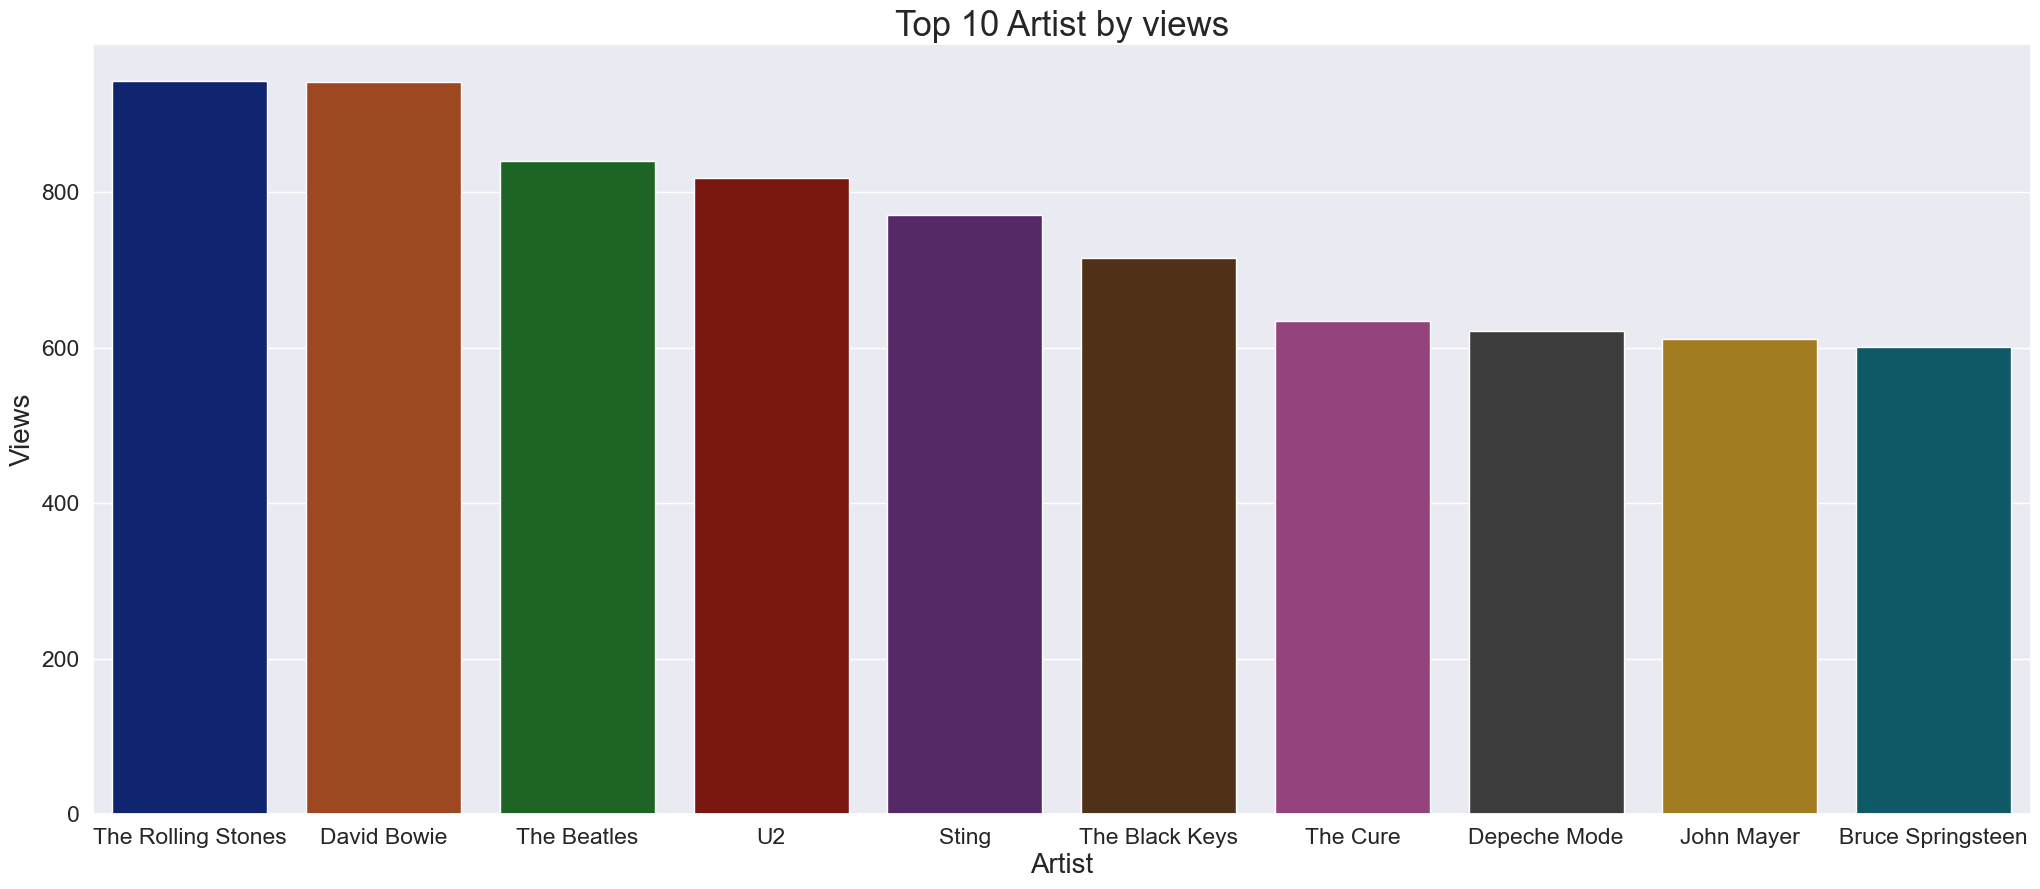

In [41]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = rnsplaylist10, x = "artist", order = top_10.index)
plt.title("Top 10 Artist by views", fontsize = 25)
plt.ylabel("Views", fontsize = 20)
plt.xlabel("Artist", fontsize = 20)
plt.show()

# Ramowka RNS

In [42]:
start_date='2020-07-10'
end_date='2023-05-02'
daterange = pd.date_range(start_date, end_date)


ramowka_infolist=[]

for single_date in daterange:
    url = "https://nowyswiat.online/ramowka?search={}".format(single_date.strftime("%Y-%m-%d"))
    headers = {
  'authority': 'nowyswiat.online',
  'accept': '*/*',
  'accept-language': 'pl-PL,pl;q=0.9,en-US;q=0.8,en;q=0.7',
  'sec-ch-ua': '"Chromium";v="112", "Google Chrome";v="112", "Not:A-Brand";v="99"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-origin',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
  'x-requested-with': 'XMLHttpRequest'
     }
    response = requests.request("GET", url, headers=headers)
    soup = bs(response.content,'html.parser')  

    #title_ramowka=soup.find('h2', {'class': 'rns-switcher-title'}).get_text()
    #redactor=soup.find('div', {'class': 'rns-switcher-names'}).get_text()
    #time_ramowka=soup.find('div', {'class': 'rns-switcher-time'}).get_text()

    list_title_ramowka=soup.find_all('h2', {'class': 'rns-switcher-title'})
    list_redactor=soup.find_all('div', {'class': 'rns-switcher-names'})
    list_time_ramowka=soup.find_all('div', {'class': 'rns-switcher-time'})

    for it in range(len(list_title_ramowka)):
        ramowka_info={}
        title_ramowka = list_title_ramowka[it].get_text(" ", strip=True).replace("\r\n"," ")
        redactor = list_redactor[it].get_text(" ", strip=True).replace("\r\n"," ")
        time_ramowka=list_time_ramowka[it].get_text(" ", strip=True).replace("\r\n"," ")
        ramowka_info['title_ramowka']=title_ramowka
        ramowka_info['redactor']=redactor
        ramowka_info['time_ramowka']=time_ramowka
        ramowka_info['date']=single_date
        ramowka_infolist.append(ramowka_info)
        
rnsramowkaall=pd.DataFrame(ramowka_infolist)

In [43]:
#rnsramowkaall.to_csv('RNS_rnsramowka_all.csv')


In [13]:
rnsramowkaall= pd.read_csv("RNS_rnsramowka_all.csv")

## Clean and prepare data ramowka rns

In [14]:
rnsramowkaall

,Unnamed: 0,title_ramowka,redactor,time_ramowka,date
0,0,Muzyka do rana,NaN,0:00,2020-07-10
1,1,Poranna Manna,Wojciech Mann,6:00,2020-07-10
2,2,W środku dnia,Michał Nogaś,10:00,2020-07-10
3,3,Zamach na dziesiątą muzę,Zbigniew Zamachowski,14:00,2020-07-10
4,4,Świat nowej muzyki,Bartek Winczewski,15:00,2020-07-10
...,...,...,...,...,...
6132,6132,Klimaty na raty,Jan Janczy,14:00,2023-05-02
6133,6133,Nowy Świat po południu,Michał Porycki | Klaudiusz Slezak o polityce Damian Kupczyk : Jak edukować młodych ludzi pod kątem finansów? Sylwester Kowalski : Jak wiele mówi o nas budowa mózgu?,16:00,2023-05-02
6134,6134,Wagle,Wojciech Waglewski,19:00,2023-05-02
6135,6135,Punkt widzenia,Beata Grabarczyk | Goście: prof. Tadeusz Bartoś i Mateusz Mazzini,21:00,2023-05-02


In [67]:
rnsramowkaall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title_ramowka  6137 non-null   object        
 1   redactor       5371 non-null   object        
 2   datetime       6137 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 144.0+ KB


In [89]:
rnsramowkaall=rnsramowkaall.drop(columns='Unnamed: 0')

In [60]:
rnsramowkaall.redactor=rnsramowkaall.redactor.str.split('|',n=1, expand=True).drop(columns=[1])

In [62]:
rnsramowkaall['datetime']=pd.to_datetime(rnsramowkaall['date'] + ' ' + rnsramowkaall['time_ramowka'])
rnsramowkaall

,title_ramowka,redactor,time_ramowka,date,datetime
0,Muzyka do rana,NaN,0:00,2020-07-10,2020-07-10 00:00:00
1,Poranna Manna,Wojciech Mann,6:00,2020-07-10,2020-07-10 06:00:00
2,W środku dnia,Michał Nogaś,10:00,2020-07-10,2020-07-10 10:00:00
3,Zamach na dziesiątą muzę,Zbigniew Zamachowski,14:00,2020-07-10,2020-07-10 14:00:00
4,Świat nowej muzyki,Bartek Winczewski,15:00,2020-07-10,2020-07-10 15:00:00
...,...,...,...,...,...
6132,Klimaty na raty,Jan Janczy,14:00,2023-05-02,2023-05-02 14:00:00
6133,Nowy Świat po południu,Michał Porycki,16:00,2023-05-02,2023-05-02 16:00:00
6134,Wagle,Wojciech Waglewski,19:00,2023-05-02,2023-05-02 19:00:00
6135,Punkt widzenia,Beata Grabarczyk,21:00,2023-05-02,2023-05-02 21:00:00


In [65]:
rnsramowkaall=rnsramowkaall.drop(columns=['time_ramowka','date'])

In [86]:
#rnsramowkaall.to_csv('RNS_rnsramowka_all_cleaned.csv')

In [15]:
rnsramowkaall= pd.read_csv("RNS_rnsramowka_all_cleaned.csv")

#### Ramowka is not full available on the website. In 2020 is some missing days, 2021 has only two months. So we will consider only 2022 

In [103]:
masktimernsramowka2022=rnsramowkaall.datetime.between('2022-01-01','2023-01-01')
masktimernsramowka2022

0       False
1       False
2       False
3       False
4       False
        ...  
6132    False
6133    False
6134    False
6135    False
6136    False
Name: datetime, Length: 6137, dtype: bool

In [104]:
rnsramowka2022=rnsramowkaall.loc[masktimernsramowka2022]
rnsramowka2022

,title_ramowka,redactor,datetime
961,Muzyka do rana,NaN,2022-01-02 00:00:00
962,De Cuba Su Musica,Jose Torres,2022-01-02 08:00:00
963,Zbiory prywatne,Maria Zamachowska,2022-01-02 10:00:00
964,Manniak po omacku,Wojciech Mann,2022-01-02 11:00:00
965,Raczek movie,Tomasz Raczek,2022-01-02 13:00:00
...,...,...,...
4851,Miłomuzomania,Kinga Krasuska,2022-12-31 16:00:00
4852,Mięta do (pop)kultury,Katarzyna Oklińska,2022-12-31 18:00:00
4853,"Szczyt wszystkiego, czyli każda lista świata","Mateusz Andruszkiewicz, Maciej Jankowski, Marcin Mann",2022-12-31 19:00:00
4854,TIP-TOP Lista Radia Nowy Świat,Michał Porycki,2022-12-31 20:00:00


In [16]:
#rnsramowka2022.to_csv('RNS_rnsramowka2022.csv')
rnsramowka2022=pd.read_csv('RNS_rnsramowka2022.csv')


#### I need prepare table where is range time every work redactor for join table in sql later

In [11]:
rnsramowka2022daterange=rnsramowka2022.rename(columns={'datetime':'datetimestart'})

In [12]:
rnsramowka2022daterange['datetimeend']=rnsramowka2022daterange.datetimestart.shift(periods=-1)

In [13]:
rnsramowka2022daterange=rnsramowka2022daterange.drop(columns=['Unnamed: 0'])

In [14]:
rnsramowka2022daterange

,title_ramowka,redactor,datetimestart,datetimeend
0,Muzyka do rana,NaN,2022-01-02 00:00:00,2022-01-02 08:00:00
1,De Cuba Su Musica,Jose Torres,2022-01-02 08:00:00,2022-01-02 10:00:00
2,Zbiory prywatne,Maria Zamachowska,2022-01-02 10:00:00,2022-01-02 11:00:00
3,Manniak po omacku,Wojciech Mann,2022-01-02 11:00:00,2022-01-02 13:00:00
4,Raczek movie,Tomasz Raczek,2022-01-02 13:00:00,2022-01-02 14:00:00
...,...,...,...,...
3890,Miłomuzomania,Kinga Krasuska,2022-12-31 16:00:00,2022-12-31 18:00:00
3891,Mięta do (pop)kultury,Katarzyna Oklińska,2022-12-31 18:00:00,2022-12-31 19:00:00
3892,"Szczyt wszystkiego, czyli każda lista świata","Mateusz Andruszkiewicz, Maciej Jankowski, Marc...",2022-12-31 19:00:00,2022-12-31 20:00:00
3893,TIP-TOP Lista Radia Nowy Świat,Michał Porycki,2022-12-31 20:00:00,2022-12-31 22:00:00


## Data analysis

In [105]:
rnsramowka2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3895 entries, 961 to 4855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title_ramowka  3895 non-null   object
 1   redactor       3399 non-null   object
 2   datetime       3895 non-null   object
dtypes: object(3)
memory usage: 121.7+ KB


In [106]:
rnsramowka2022.nunique()

title_ramowka      88
redactor          159
datetime         3895
dtype: int64

In [107]:
rnsramowka2022.redactor.describe()

count                3399
unique                159
top       Michał Porycki 
freq                  146
Name: redactor, dtype: object

In [108]:
rnsramowka2022.title_ramowka.describe()

count               3895
unique                88
top       Muzyka do rana
freq                 357
Name: title_ramowka, dtype: object

##### There are some duplicates in redactors. i need fix this

In [17]:
top10redactor2022=rnsramowka2022.redactor.value_counts()
top10redactor2022.head(10)

redactor
Michał Porycki            146
Jan Niebudek              117
Mateusz Andruszkiewicz    104
Marcelina Słomian         100
Michał Porycki             98
Kinga Krasuska             97
Jan Niebudek               91
Wojciech Mann              86
Mikołaj Tyczyński          80
Beata Grabarczyk           78
Name: count, dtype: int64

In [18]:
top10title_ramowka2022=rnsramowka2022.title_ramowka.value_counts()
top10title_ramowka2022.head(10)

title_ramowka
Muzyka do rana            357
Nowy Świat po południu    260
W środku dnia             260
Nowy świt                 208
Punkt widzenia            125
Nasze nocne granie         72
Klimaty na raty            57
Soulówka                   55
Raczek movie               53
RadioAktywni               52
Name: count, dtype: int64

# List artists with countries and genres

In [21]:
listartist = pd.read_csv("artists.csv", usecols=['artist_mb','country_mb'])
listartist

,artist_mb,country_mb
0,Coldplay,United Kingdom
1,Radiohead,United Kingdom
2,Red Hot Chili Peppers,United States
3,Rihanna,United States
4,Eminem,United States
...,...,...
1466078,정은지,South Korea
1466079,남태현,South Korea
1466080,헤일로,South Korea
1466081,서현진,South Korea


In [121]:
listartist.loc[listartist['artist_mb']=='Perfect']

,artist_mb,country_mb
6148,Perfect,Poland
6149,Perfect,United States
6150,Perfect,Jamaica
6151,Perfect,United Kingdom
1257213,Perfect,NaN


In [24]:
listartist=listartist.drop_duplicates(subset=['artist_mb'])

In [14]:
listartistgenres = pd.read_csv("artists.csv", usecols=['artist_mb','country_mb', 'tags_lastfm'])
listartistgenres

C:\Users\mpuch\AppData\Local\Temp\ipykernel_62528\1471438929.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  listartistgenres = pd.read_csv("artists.csv", usecols=['artist_mb','country_mb', 'tags_lastfm'])


,artist_mb,country_mb,tags_lastfm
0,Coldplay,United Kingdom,rock; alternative; britpop; alternative rock; indie; british; seen live; Coldplay; pop; indie rock; pop rock; piano rock; UK; soft rock; Mellow; male vocalists; chillout; piano; 00s; chill; favorites; indie pop; acoustic; singer-songwriter; emo; english; Love; classic rock; electronic; brit rock; brit pop; overrated; 90s; Pop-Rock; cold play; Favourites; Britrock; relax
1,Radiohead,United Kingdom,alternative; alternative rock; rock; indie; electronic; seen live; british; britpop; indie rock; experimental; radiohead; Progressive rock; 90s; art rock; electronica; Experimental Rock; post-rock; UK; psychedelic; pop; ambient; favorites; overrated; melancholic; Progressive; 00s; male vocalists; Awesome; english; chillout; beautiful; genius; indie pop; trip-hop; melancholy; classic rock; emo; idm; better than radiohead
2,Red Hot Chili Peppers,United States,rock; alternative rock; alternative; Funk Rock; funk; seen live; Red Hot Chili Peppers; punk; american; indie; 90s; California; rhcp; crossover; classic rock; hard rock; pop; 80s; funk metal; punk rock; metal; indie rock; USA; 00s; pop rock; funky; Grunge; male vocalists; favorites
3,Rihanna,United States,pop; rnb; female vocalists; dance; Hip-Hop; Rihanna; r&b; seen live; reggae; hip hop; sexy; female; female vocalist; american; dancehall; barbados; soul; barbadian; electronic; 00s; dance-pop; club; urban; r'n'b; guilty pleasure; electropop; hot; party; rhythm and blues; dance pop; Love; diva; beautiful; rock; USA; pop rock; mainstream; r and b; Guilty Pleasures; hiphop; legend; bitch; rap; House; alternative; amazing; english; Britney Spears; umbrella
4,Eminem,United States,rap; Hip-Hop; Eminem; hip hop; pop; american; detroit; seen live; hiphop; Gangsta Rap; male vocalists; slim shady; rock; alternative; hardcore rap; 00s; 90s; USA; singer-songwriter; Shady; d12; emo; Horrorcore; Aftermath; dance; Michigan; white rap
...,...,...,...
1466078,정은지,South Korea,NaN
1466079,남태현,South Korea,NaN
1466080,헤일로,South Korea,NaN
1466081,서현진,South Korea,NaN


In [73]:
genre = listartistgenres.tags_lastfm.str.split(";",n=4, expand = True).drop(columns=4)
genre

,0,1,2,3
0,rock,alternative,britpop,alternative rock
1,alternative,alternative rock,rock,indie
2,rock,alternative rock,alternative,Funk Rock
3,pop,rnb,female vocalists,dance
4,rap,Hip-Hop,Eminem,hip hop
...,...,...,...,...
1466078,NaN,NaN,NaN,NaN
1466079,NaN,NaN,NaN,NaN
1466080,NaN,NaN,NaN,NaN
1466081,NaN,NaN,NaN,NaN


In [74]:
genre=genre.stack().reset_index(level=1, drop=True).to_frame()

In [75]:
genre=genre.merge(listartistgenres[['artist_mb','country_mb']], how='left', left_index=True, right_index = True)

In [76]:
genre=genre.rename(columns={0:'genre','artist_mb':'artist','country_mb':'country'})
genre

,genre,artist,country
0,rock,Coldplay,United Kingdom
0,alternative,Coldplay,United Kingdom
0,britpop,Coldplay,United Kingdom
0,alternative rock,Coldplay,United Kingdom
1,alternative,Radiohead,United Kingdom
...,...,...,...
986728,french,군기,NaN
986728,rock,군기,NaN
986728,ambient,군기,NaN
986743,Brown eyes,브라운아이즈,NaN


In [19]:
#genre.to_csv('genre.csv')
genre= pd.read_csv("genre.csv")

# Merges

### Merge playlist with artist country

In [22]:
playlistwithcountry=rnsplaylistall.merge(listartist,how='left', left_on='artist', right_on='artist_mb')
playlistwithcountry=playlistwithcountry.drop(['Unnamed: 0','artist_mb'],axis=1)
playlistwithcountry=playlistwithcountry.rename(columns={'country_mb':'country'})
playlistwithcountry.head(10).sort_values(by=['datetime'])

,title,artist,datetime,country
6,The Sound of Silence,Disturbed,2020-07-10 23:33:00,United States
7,The Sound of Silence,Disturbed,2020-07-10 23:33:00,NaN
8,The Sound of Silence,Disturbed,2020-07-10 23:33:00,NaN
9,The Sound of Silence,Disturbed,2020-07-10 23:33:00,United Kingdom
5,Tinseltown in the Rain,The Blue Nile,2020-07-10 23:37:00,United Kingdom
4,Tadpoles in a Jar,Jimmy Nail,2020-07-10 23:43:00,United Kingdom
3,Pokaż mi język,Bisz/Radex,2020-07-10 23:47:00,NaN
2,If You're Gonna Leave,Raul Midon,2020-07-10 23:50:00,NaN
1,Highwomen,The Highwomen,2020-07-10 23:54:00,NaN
0,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,United States


In [23]:
#playlistwithcountry.to_csv('playlistwithcountry.csv')
playlistwithcountry=pd.read_csv('playlistwithcountry.csv')

In [142]:
top_10countries=playlistwithcountry.country.value_counts().head(10)    
top_10countries

country
United States     80748
United Kingdom    51570
Poland            19376
France             5913
Canada             5038
Australia          4173
Germany            2397
Sweden             2219
Ireland            2130
Italy              1944
Name: count, dtype: int64

In [143]:
rnsplaylistcountries10=playlistwithcountry[playlistwithcountry.country.isin(top_10countries.index)]
rnsplaylistcountries10

,Unnamed: 0,title,artist,datetime,country
0,0,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,United States
4,4,Tadpoles in a Jar,Jimmy Nail,2020-07-10 23:43:00,United Kingdom
5,5,Tinseltown in the Rain,The Blue Nile,2020-07-10 23:37:00,United Kingdom
6,6,The Sound of Silence,Disturbed,2020-07-10 23:33:00,United States
8,8,Bright Lights and Promises,Janis Ian,2020-07-10 23:23:00,United States
...,...,...,...,...,...
254661,254661,Degradation Rules (feat. Tony Iommi),Ozzy Osbourne,2023-05-02 00:24:00,United States
254663,254663,Bankrobber,The Clash,2023-05-02 00:18:00,United Kingdom
254664,254664,Good Grief,Foo Fighters,2023-05-02 00:13:00,United States
254665,254665,Lifted,Trombone Shorty,2023-05-02 00:10:00,United States


In [46]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5, palette= "bright")
sns.countplot(data = rnsplaylistcountries10, x = "country", order = top_10countries.index)
plt.title("Top 10 Countries by views", fontsize = 25)
plt.ylabel("Views", fontsize = 20)
plt.xlabel("Country", fontsize = 20)
plt.show()

NameError: name 'rnsplaylistcountries10' is not defined

<Figure size 2500x1000 with 0 Axes>

### Merge playlist with artist genries

In [24]:
playlistwithgenries=rnsplaylistall.merge(genre,how='left', left_on='artist', right_on='artist')
playlistwithgenries=playlistwithgenries.drop(['Unnamed: 0_x','Unnamed: 0_y','country'],axis=1)
playlistwithgenries.head(10).sort_values(by=['datetime'])

,title,artist,datetime,genre
7,Tadpoles in a Jar,Jimmy Nail,2020-07-10 23:43:00,rock
8,Tadpoles in a Jar,Jimmy Nail,2020-07-10 23:43:00,pop
9,Tadpoles in a Jar,Jimmy Nail,2020-07-10 23:43:00,soft rock
6,Pokaż mi język,Bisz/Radex,2020-07-10 23:47:00,NaN
5,If You're Gonna Leave,Raul Midon,2020-07-10 23:50:00,NaN
4,Highwomen,The Highwomen,2020-07-10 23:54:00,NaN
0,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,Grunge
1,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,alternative rock
2,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,rock
3,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,post-grunge


In [25]:
#playlistwithgenries.to_csv('playlistwithgenries.csv')
playlistwithgenries=pd.read_csv('playlistwithgenries.csv')

In [47]:
top_10genries=playlistwithgenries.genre.value_counts().head(10)    
top_10genries

genre
 rock                 44229
 alternative          27380
 female vocalists     26623
 singer-songwriter    22603
 seen live            21621
rock                  21056
 indie                19285
 pop                  17391
 classic rock         16641
 polish               14759
Name: count, dtype: int64

In [137]:
rnsplaylistgenries10=playlistwithgenries[playlistwithgenries.genre.isin(top_10genries.index)]
rnsplaylistgenries10

,Unnamed: 0,title,artist,datetime,genre
0,0,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,Grunge
1,1,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,alternative rock
2,2,"Touch, Peel and Stand",Days of the New,2020-07-10 23:57:00,rock
7,7,Tadpoles in a Jar,Jimmy Nail,2020-07-10 23:43:00,rock
8,8,Tadpoles in a Jar,Jimmy Nail,2020-07-10 23:43:00,pop
...,...,...,...,...,...
847867,847867,Lifted,Trombone Shorty,2023-05-02 00:10:00,seen live
847868,847868,Danger Zone,Kenny Loggins,2023-05-02 00:07:00,80s
847869,847869,Danger Zone,Kenny Loggins,2023-05-02 00:07:00,rock
847870,847870,Danger Zone,Kenny Loggins,2023-05-02 00:07:00,pop


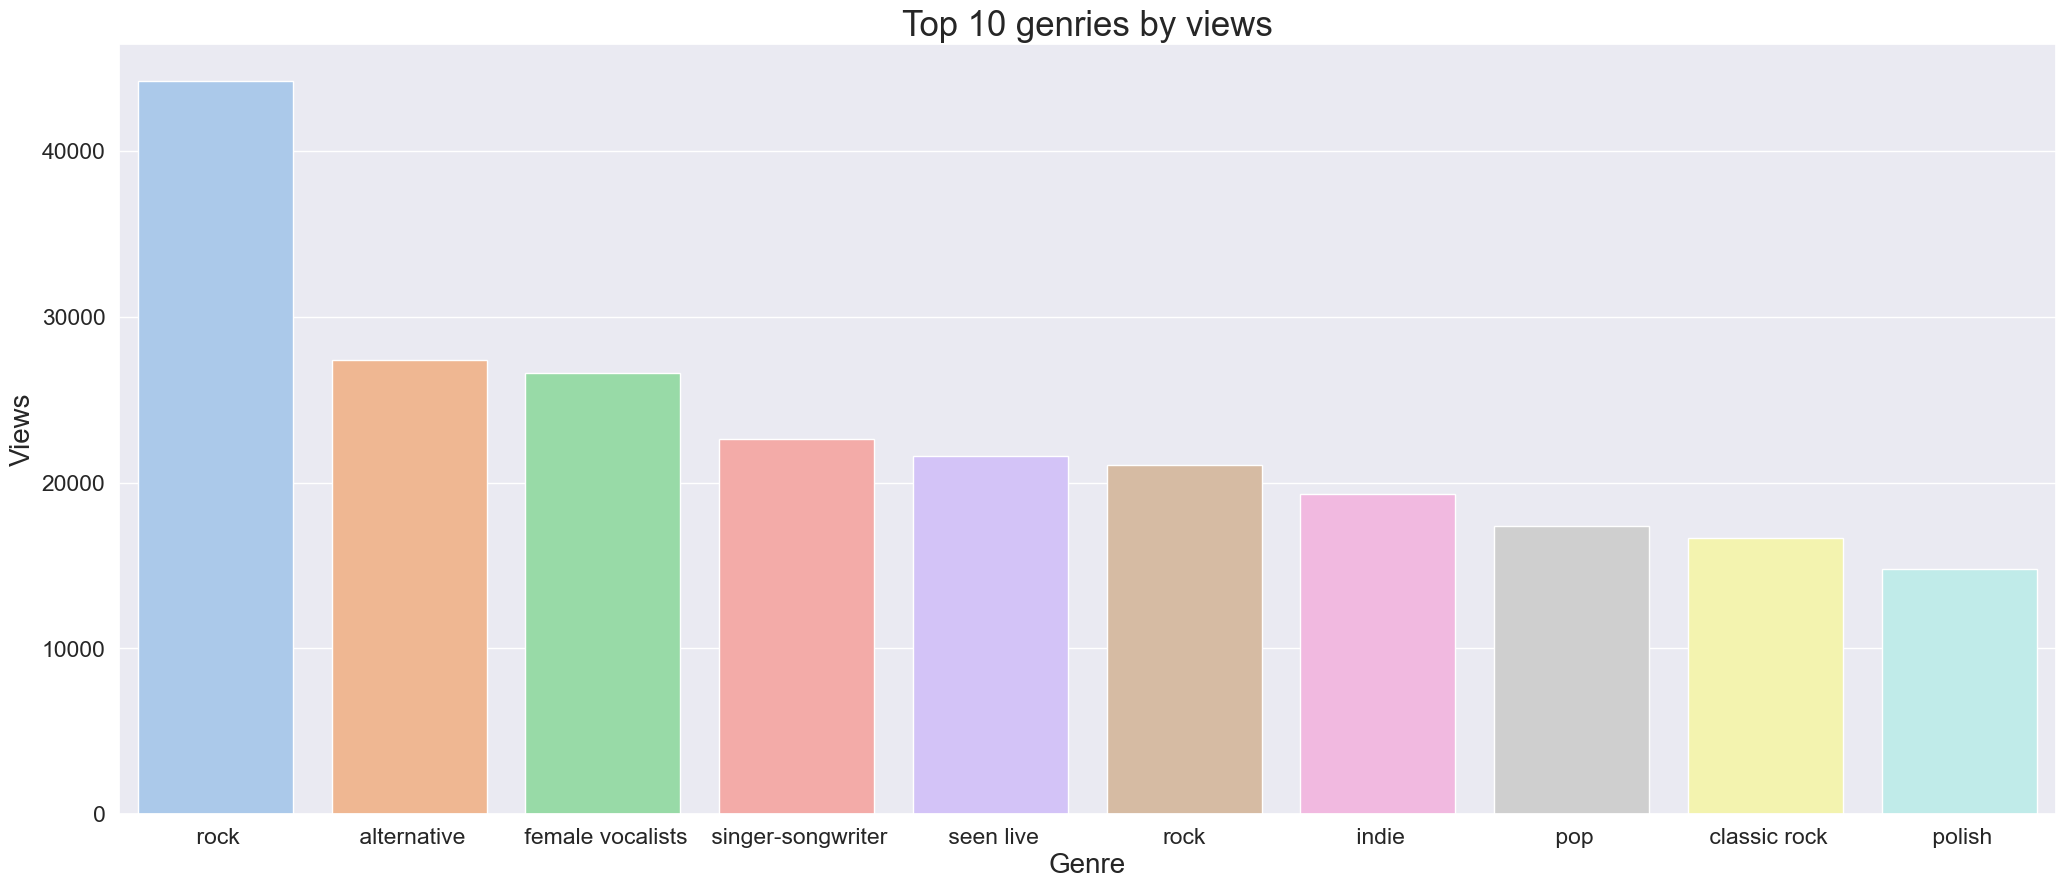

In [140]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5, palette= "pastel")
sns.countplot(data = rnsplaylistgenries10, x = "genre", order = top_10genries.index)
plt.title("Top 10 genries by views", fontsize = 25)
plt.ylabel("Views", fontsize = 20)
plt.xlabel("Genre", fontsize = 20)
plt.show()

### Merge playlist with ramowka
#### I will use sqllite for join tables

In [65]:
con = sq3.connect("RNS_data.db")

In [19]:
con

In [4]:
con.execute("Select * FROM sqlite_master").fetchall()

[]

In [160]:
con.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name").fetchall()

[]

In [15]:
rnsramowka2022daterange.to_sql("rnsramowka2022daterange", con, index = False)

3895

In [9]:
rnsplaylistall.to_sql("rnsplaylistall", con, index = False)

254669

In [171]:
listartist.to_sql("listartist", con, index = False)

1352996

In [172]:
genre.to_sql("genre", con, index = False)

1334710

In [173]:
con.execute("Select * FROM sqlite_master").fetchall()

[('table',
  'rnsramowka2022daterange',
  'rnsramowka2022daterange',
  2,
  'CREATE TABLE "rnsramowka2022daterange" (\n"title_ramowka" TEXT,\n  "redactor" TEXT,\n  "datetimestart" TEXT,\n  "datetimeend" TEXT\n)'),
 ('table',
  'rnsplaylistall',
  'rnsplaylistall',
  80,
  'CREATE TABLE "rnsplaylistall" (\n"Unnamed: 0" INTEGER,\n  "title" TEXT,\n  "artist" TEXT,\n  "datetime" TEXT\n)'),
 ('table',
  'listartist',
  'listartist',
  4122,
  'CREATE TABLE "listartist" (\n"artist_mb" TEXT,\n  "country_mb" TEXT\n)'),
 ('table',
  'genre',
  'genre',
  12934,
  'CREATE TABLE "genre" (\n"Unnamed: 0" INTEGER,\n  "genre" TEXT,\n  "artist" TEXT,\n  "country" TEXT\n)')]

In [77]:
con.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name").fetchall()

[('playlistawithredactor',), ('rnsplaylistall',), ('rnsramowka2022daterange',)]

In [179]:
playlistawithredactor=pd.read_sql("SELECT title,artist,datetime,title_ramowka,redactor \
            FROM rnsplaylistall \
             JOIN rnsramowka2022daterange \
            ON datetime between datetimestart and datetimeend ", con)

In [27]:
#playlistawithredactor.to_csv('playlistawithredactor.csv')
playlistawithredactor=pd.read_csv('playlistawithredactor.csv')

In [76]:
playlistawithredactor.to_sql("playlistawithredactor", con, index = False)

92822

#### Remember, range date below is only 2022, because other years was incomplete in RNSramówka

In [28]:
playlistawithredactor.head(10).sort_values(by=['datetime'], ascending=True).drop(columns=['Unnamed: 0'])

,title,artist,datetime,title_ramowka,redactor
9,I Hallonbergen,Marie Selander,2022-01-02 23:16:00,Osobiste wycieczki,Maciej Grzenkowicz
8,Ahududu,Kolektif İstanbul,2022-01-02 23:20:00,Osobiste wycieczki,Maciej Grzenkowicz
7,Frambuesa y Jazmín,Max Tupper,2022-01-02 23:26:00,Osobiste wycieczki,Maciej Grzenkowicz
6,Occhi di Lampone,Lucio Matricardi,2022-01-02 23:31:00,Osobiste wycieczki,Maciej Grzenkowicz
5,Framboise,Boby Lapointe,2022-01-02 23:37:00,Osobiste wycieczki,Maciej Grzenkowicz
4,"""ზელონი"" ბუშტი",ზაზა კორინთელი,2022-01-02 23:40:00,Osobiste wycieczki,Maciej Grzenkowicz
3,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz
2,산딸기,Kontrajelly,2022-01-02 23:49:00,Osobiste wycieczki,Maciej Grzenkowicz
1,МАЛИНА (feat. ACID.FLICKER.FAMILY),Lil Morty,2022-01-02 23:53:00,Osobiste wycieczki,Maciej Grzenkowicz
0,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz


In [185]:
playlistawithcountryredactor=pd.read_sql("SELECT title,artist,datetime,redactor,country_mb \
            FROM playlistawithredactor pwr \
             JOIN listartist la \
            ON pwr.artist=la.artist_mb ", con)

In [95]:
infowesoły=pd.read_sql("SELECT * FROM rnsplaylistall WHERE title like '%co z tobą%' ", con)
infowesoły.head(400)

,Unnamed: 0,title,artist,time,date
0,437,Co z Tobą mała,Skarby,22:23,2020-07-12
1,3293,Co z Tobą mała,Skarby,03:22,2020-07-24
2,3969,Co z Tobą mała,Skarby,08:35,2020-07-27
3,7446,Co z Tobą mała,Skarby,23:39,2020-08-11
4,7795,Co z Tobą mała,Skarby,09:08,2020-08-12
5,8487,Co z tobą mała,Irena Santor,11:44,2020-08-15
6,11234,Co z Tobą mała,Skarby,04:45,2020-08-26
7,13683,Co z Tobą mała,Skarby,22:03,2020-09-06
8,16847,Co z Tobą mała,Skarby,06:07,2020-09-19
9,19768,Co z Tobą mała,Skarby,23:03,2020-10-02


In [31]:
playlistawithcountryredactor.head(10).sort_values(by=['datetime'], ascending=True).drop(columns=['Unnamed: 0'])

,title,artist,datetime,redactor,country_mb
9,Take This Waltz,Leonard Cohen,2022-01-02 21:53:00,Andrzej Poniedzielski,Canada
8,Sarah in Bath (Nieustraszeni pogromcy wampiów),Krzysztof Komeda,2022-01-02 21:58:00,Andrzej Poniedzielski,Poland
7,S.O.S.,Kalina Jędrusik,2022-01-02 22:03:00,Marcelina Słomian,Poland
6,Takie ciało,Monika Borzym,2022-01-02 22:07:00,Marcelina Słomian,Poland
5,Karatetyka,Nosowska,2022-01-02 22:50:00,Marcelina Słomian,Poland
4,Sutra,Sistars,2022-01-02 22:56:00,Marcelina Słomian,Poland
3,I Hallonbergen,Marie Selander,2022-01-02 23:16:00,Maciej Grzenkowicz,Sweden
2,Framboise,Boby Lapointe,2022-01-02 23:37:00,Maciej Grzenkowicz,France
1,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Maciej Grzenkowicz,Germany
0,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Maciej Grzenkowicz,Italy


In [30]:
#playlistawithcountryredactor.to_csv('playlistawithcountryredactor.csv')
playlistawithcountryredactor=pd.read_csv('playlistawithcountryredactor.csv')

In [188]:
playlistawithcountryredactor.to_sql('playlistawithcountryredactor', con, index = False)

71974

In [24]:
con.close()

In [28]:
playlistawithgenriesredactor=playlistawithredactor.merge(genre[['genre','artist']],how='left',left_on='artist', right_on='artist')
playlistawithgenriesredactor=playlistawithgenriesredactor.drop(columns=['Unnamed: 0'])

In [38]:
playlistawithgenriesredactor.to_csv('playlistawithgenriesredactor.csv')

In [32]:
playlistawithgenriesredactor=pd.read_csv('playlistawithgenriesredactor.csv')

In [33]:
playlistawithgenriesredactor.head(10).sort_values(by=['datetime'], ascending=True)

,Unnamed: 0,title,artist,datetime,title_ramowka,redactor,genre
6,6,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz,Schlager
7,7,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz,deutsch
8,8,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz,Deutsche Schlager
9,9,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz,german
5,5,산딸기,Kontrajelly,2022-01-02 23:49:00,Osobiste wycieczki,Maciej Grzenkowicz,NaN
4,4,МАЛИНА (feat. ACID.FLICKER.FAMILY),Lil Morty,2022-01-02 23:53:00,Osobiste wycieczki,Maciej Grzenkowicz,NaN
0,0,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz,italian
1,1,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz,pop
2,2,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz,60s
3,3,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz,singer-songwriter


In [34]:
playlistawithgenriesredactor.iloc[0:10].sort_values(by=['datetime'], ascending=True)

,Unnamed: 0,title,artist,datetime,title_ramowka,redactor,genre
6,6,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz,Schlager
7,7,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz,deutsch
8,8,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz,Deutsche Schlager
9,9,Himbeereis zum Frühstück,Hoffmann & Hoffmann,2022-01-02 23:45:00,Osobiste wycieczki,Maciej Grzenkowicz,german
5,5,산딸기,Kontrajelly,2022-01-02 23:49:00,Osobiste wycieczki,Maciej Grzenkowicz,NaN
4,4,МАЛИНА (feat. ACID.FLICKER.FAMILY),Lil Morty,2022-01-02 23:53:00,Osobiste wycieczki,Maciej Grzenkowicz,NaN
0,0,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz,italian
1,1,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz,pop
2,2,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz,60s
3,3,Banane e lampone,Gianni Morandi,2022-01-02 23:56:00,Osobiste wycieczki,Maciej Grzenkowicz,singer-songwriter


### All the prepared lists
 rnsplaylistall
 rnsramowkaall
 rnsramowka2022
 listartist
 genre
 playlistwithcountry
 playlistawithredactor
 playlistawithcountryredactor
 playlistawithgenriesredactor

In [41]:
rnsplaylistall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254669 entries, 0 to 254668
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  254669 non-null  int64 
 1   title       254666 non-null  object
 2   artist      254597 non-null  object
 3   datetime    254669 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.8+ MB


In [42]:
rnsramowkaall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     6137 non-null   int64 
 1   title_ramowka  6137 non-null   object
 2   redactor       5259 non-null   object
 3   datetime       6137 non-null   object
dtypes: int64(1), object(3)
memory usage: 191.9+ KB


In [43]:
rnsramowka2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3895 non-null   int64 
 1   title_ramowka  3895 non-null   object
 2   redactor       3399 non-null   object
 3   datetime       3895 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.8+ KB


In [44]:
listartist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466083 entries, 0 to 1466082
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   artist_mb   1466070 non-null  object
 1   country_mb  662368 non-null   object
dtypes: object(2)
memory usage: 22.4+ MB


In [45]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334710 entries, 0 to 1334709
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1334710 non-null  int64 
 1   genre       1334708 non-null  object
 2   artist      1334687 non-null  object
 3   country     719546 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.7+ MB


In [46]:
playlistwithcountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254669 entries, 0 to 254668
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  254669 non-null  int64 
 1   title       254666 non-null  object
 2   artist      254597 non-null  object
 3   datetime    254669 non-null  object
 4   country     187714 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.7+ MB


In [47]:
playlistawithredactor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92822 entries, 0 to 92821
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     92822 non-null  int64 
 1   title          92820 non-null  object
 2   artist         92764 non-null  object
 3   datetime       92822 non-null  object
 4   title_ramowka  92822 non-null  object
 5   redactor       57583 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.2+ MB


In [48]:
playlistawithcountryredactor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71974 entries, 0 to 71973
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71974 non-null  int64 
 1   title       71974 non-null  object
 2   artist      71974 non-null  object
 3   datetime    71974 non-null  object
 4   redactor    43636 non-null  object
 5   country_mb  66517 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.3+ MB


In [49]:
 playlistawithgenriesredactor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298986 entries, 0 to 298985
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     298986 non-null  int64 
 1   title          298940 non-null  object
 2   artist         297652 non-null  object
 3   datetime       298986 non-null  object
 4   title_ramowka  298986 non-null  object
 5   redactor       181444 non-null  object
 6   genre          268323 non-null  object
dtypes: int64(1), object(6)
memory usage: 16.0+ MB


In [89]:
#substring = 'mann'
#redactor=playlistawithcountryredactor[playlistawithcountryredactor.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
#redactor.redactor.str.isspace()

In [88]:
#redactor.redactor.str.isspace().head(1000)

In [81]:
top_10country = playlistawithcountryredactor.country_mb.value_counts().head(10)
top_10country

country_mb
United States     30004
United Kingdom    17675
Poland             5610
France             1961
Canada             1680
Australia          1497
Germany             923
Sweden              823
Ireland             749
Italy               731
Name: count, dtype: int64

In [42]:
top_10redactor = playlistawithcountryredactor.redactor.value_counts().head(10)
top_10redactor

redactor
Jan Niebudek               2974
Michał Porycki             2688
Jan Niebudek               2212
Mateusz Andruszkiewicz     1996
Michał Porycki             1854
Mateusz Andruszkiewicz     1753
Kinga Krasuska             1518
Wojciech Mann              1302
Jan Janczy                 1197
Maciej Jankowski           1172
Name: count, dtype: int64

In [43]:
top_10redactor.to_csv('top_10redactortest.csv')

In [35]:
top_10countryredactor=playlistawithcountryredactor.groupby(['redactor','country_mb']).agg(Country=('country_mb','count')).sort_values(by=['Country'], ascending=False).head(10)
top_10countryredactor

,,Country
redactor,country_mb,
Jan Niebudek,United States,1348
Michał Porycki,United States,1194
Jan Niebudek,United States,982
Mateusz Andruszkiewicz,United States,980
Jan Niebudek,United Kingdom,921
Michał Porycki,United States,890
Mateusz Andruszkiewicz,United States,852
Michał Porycki,United Kingdom,733
Wojciech Mann,United States,729


In [119]:
top_10countryredactor2 = playlistawithcountryredactor[playlistawithcountryredactor.country_mb.isin(top_10country.index)]
top_10countryredactor3=top_10countryredactor2[top_10countryredactor2.redactor.isin(top_10redactor.index)]
top_10countryredactor3

,Unnamed: 0,title,artist,datetime,redactor,country_mb
33,33,Black Gold (feat. Thundercat),Flying Lotus,2022-01-02 18:49:00,Mateusz Andruszkiewicz,United States
34,34,Speechless,Nas,2022-01-02 18:46:00,Mateusz Andruszkiewicz,United States
35,35,Dedicated,Nas,2022-01-02 18:42:00,Mateusz Andruszkiewicz,United States
36,36,Wrong Lesson,Ama Lou,2022-01-02 18:38:00,Mateusz Andruszkiewicz,United Kingdom
38,38,Non Fungible,Curren$y,2022-01-02 18:19:00,Mateusz Andruszkiewicz,United States
...,...,...,...,...,...,...
71820,71820,Familiar Feeling (Martin Buttrich Remix Edit),Moloko,2022-12-31 16:29:00,Kinga Krasuska,United Kingdom
71821,71821,Lady (Hear Me Tonight),Modjo,2022-12-31 16:25:00,Kinga Krasuska,France
71822,71822,Summer Song,Kristina Train,2022-12-31 16:21:00,Kinga Krasuska,United States
71824,71824,Get Down Saturday Night,Oliver Cheatham,2022-12-31 16:06:00,Kinga Krasuska,United States


In [36]:
## Further is much better chart. Some ugly is just checking

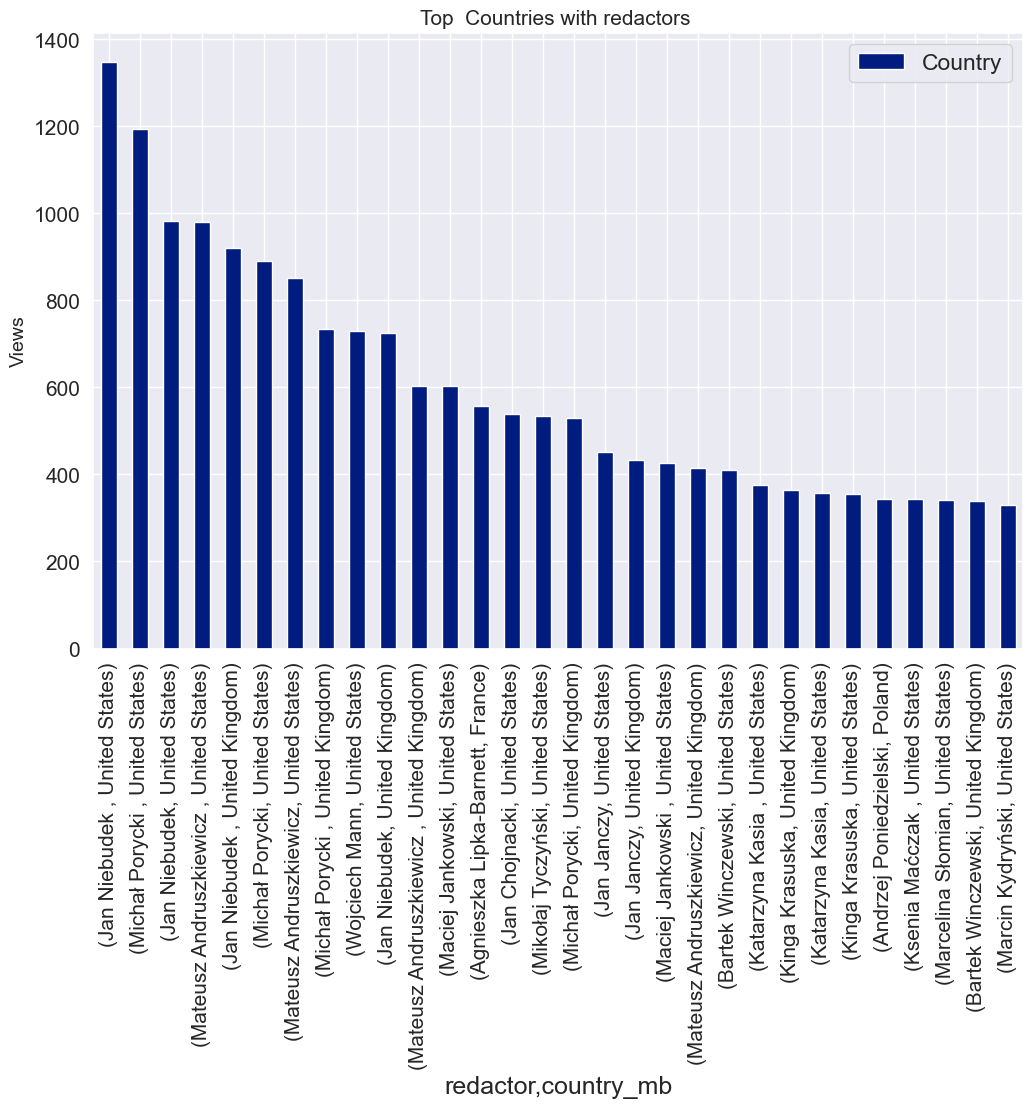

In [79]:
top_10countryredactor.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top  Countries with redactors ", fontsize = 15)
plt.ylabel("Views", fontsize = 14)
plt.show()

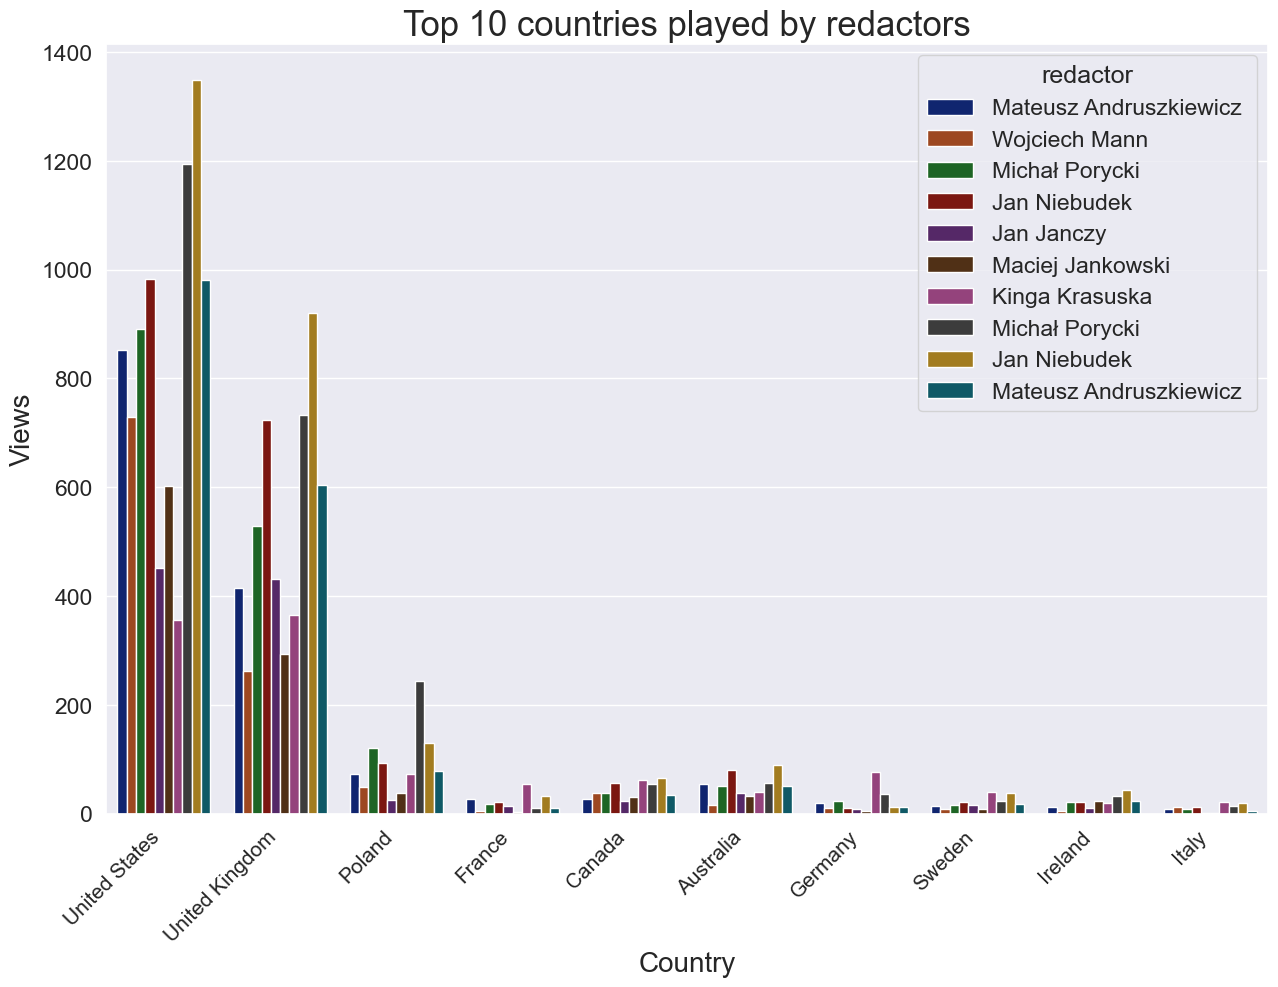

In [154]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = top_10countryredactor3, x = "country_mb",hue='redactor', order = top_10country.index)
plt.title("Top 10 countries played by redactors", fontsize = 25)
plt.ylabel("Views", fontsize = 20)
plt.xticks(rotation=45, ha="right", fontsize = 15)
plt.xlabel("Country", fontsize = 20)
plt.show()

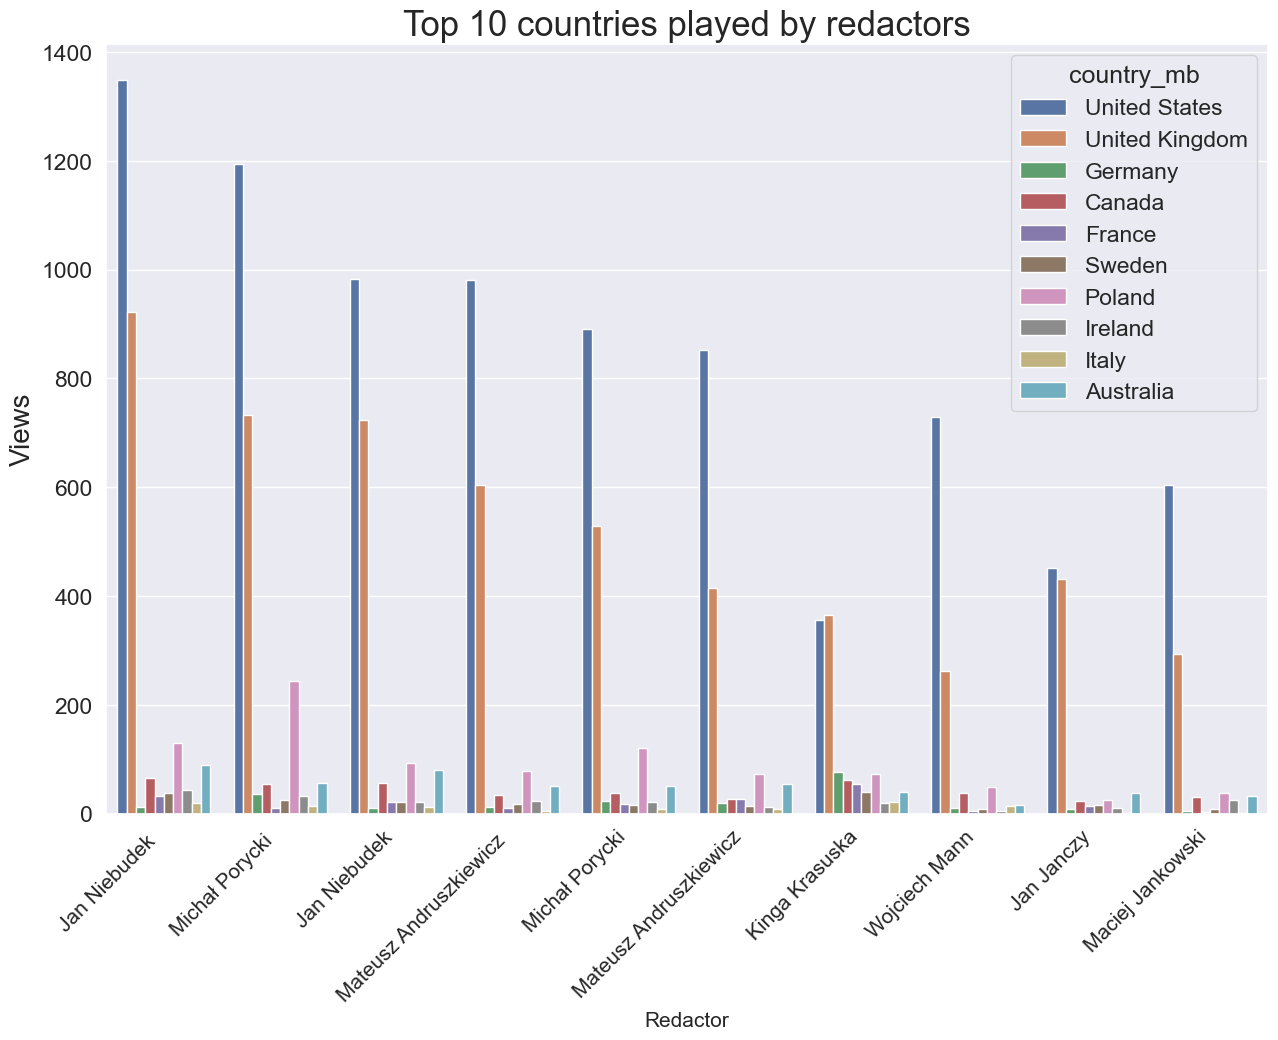

In [155]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5, palette= "deep")
sns.countplot(data = top_10countryredactor3, x = 'redactor',hue="country_mb", order = top_10redactor.index)
plt.title("Top 10 countries played by redactors", fontsize = 25)
plt.ylabel("Views", fontsize = 20)
plt.xticks(rotation=45, ha="right", fontsize = 15)
plt.xlabel("Redactor", fontsize = 15)
plt.show()

In [40]:
topartistredactor=playlistawithcountryredactor.groupby(['redactor']).agg({'artist':['count','max']})#.sort_values(by=['Country'], ascending=False).head(30)
topartistredactor.head(10)

artist                   
                                             count                max
redactor                                                             
Adam Nowak                                     748   Христина Соловій
Adam Stasiak                                   552             ZZ Top
Adam Stasiak, Barbara Gregorczyk                 9            The Who
Adriana Bąkowska, Jan Niebudek                  13   Scarlet Pleasure
Adrianna Calińska-Czaniecka                     23         Uriah Heep
Agnieszka Hejne                                 21  Zbigniew Preisner
Agnieszka Lipka-Barnett                        872       Étienne Daho
Agnieszka Lipka-Barnett                        128              alt-J
Agnieszka Lipka-Barnett, Jan Niebudek           14      Stereophonics
Agnieszka Lipka-Barnett, Mikołaj Tyczyński      13          Świetliki

In [41]:
topartistredactor2=playlistawithcountryredactor.groupby(['redactor']).artist.value_counts()
topartistredactor2.head(10)

redactor    artist            
Adam Nowak  Wojciech Młynarski    42
            Lech Janerka          31
            Tom Waits              7
            Adam Aston             7
            Klaus Mitffoch         6
            Lao Che                5
            Adam Strug             5
            Breakout               5
            Voo Voo                5
            Marek Grechuta         5
Name: count, dtype: int64

In [179]:
topartistredactor2.info()

<class 'pandas.core.series.Series'>
MultiIndex: 22674 entries, ('Adam Nowak', 'Wojciech Młynarski') to ('Zbigniew Zamachowski, Wojciech Malajkat', 'Włodzimierz Korcz')
Series name: count
Non-Null Count  Dtype
--------------  -----
22674 non-null  int64
dtypes: int64(1)
memory usage: 340.7+ KB


In [54]:
ewademarczykinfo=rnsplaylistall.loc[rnsplaylistall['artist']=='Ewa Demarczyk']

In [55]:
top100titleewademarczyk=ewademarczykinfo.title.value_counts()
top100titleewademarczyk.head(400)

title
Groszki i róże            21
Tomaszów                  14
Karuzela z madonnami       6
Skrzypek Hercowicz         4
Pocałunki                  4
Wiersze wojenne            3
Grande Valse Brillante     3
Jaki śmieszny              3
Na moście w Avignon       3
Sur le pont d'Avignon      2
Imię twe                   2
Czarne anioły              1
Gran Walce Brilliant       1
Nieśmiertelniki            1
Nahe des Geliebten         1
Rebeka                     1
Name: count, dtype: int64

In [56]:
pustkiinfo=rnsplaylistall.loc[rnsplaylistall['artist']=='Pustki']

In [57]:
top100titlepustki=pustkiinfo.title.value_counts()
top100titlepustki.head(400)

title
Lugola                     8
O krok                     3
Tchu mi brak               1
Liczę do dwóch             1
Wyjeżdżam!                 1
Nie zgubię się w tłumie    1
Się wydawało               1
Name: count, dtype: int64

In [58]:
substring = 'Demarczyk'
searchartist=rnsplaylistall[rnsplaylistall.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
searchartist

,Unnamed: 0,title,artist,datetime
187,187,Groszki i róże,Ewa Demarczyk,2020-07-11 22:53:00
903,903,Groszki i róże,Ewa Demarczyk,2020-07-14 23:51:00
1709,1709,Groszki i róże,Ewa Demarczyk,2020-07-17 10:35:00
1987,1987,Groszki i róże,Ewa Demarczyk,2020-07-18 04:36:00
5255,5255,Wiersze wojenne,Ewa Demarczyk,2020-08-02 20:02:00
8424,8424,Groszki i róże,Ewa Demarczyk,2020-08-15 12:56:00
8455,8455,Sur le pont d'Avignon,Ewa Demarczyk,2020-08-15 16:14:00
8456,8456,Czarne anioły,Ewa Demarczyk,2020-08-15 16:09:00
8457,8457,Grande Valse Brillante,Ewa Demarczyk,2020-08-15 16:04:00
8470,8470,Karuzela z madonnami,Ewa Demarczyk,2020-08-15 14:03:00


In [59]:
searchartist.head(400)

,Unnamed: 0,title,artist,datetime
187,187,Groszki i róże,Ewa Demarczyk,2020-07-11 22:53:00
903,903,Groszki i róże,Ewa Demarczyk,2020-07-14 23:51:00
1709,1709,Groszki i róże,Ewa Demarczyk,2020-07-17 10:35:00
1987,1987,Groszki i róże,Ewa Demarczyk,2020-07-18 04:36:00
5255,5255,Wiersze wojenne,Ewa Demarczyk,2020-08-02 20:02:00
8424,8424,Groszki i róże,Ewa Demarczyk,2020-08-15 12:56:00
8455,8455,Sur le pont d'Avignon,Ewa Demarczyk,2020-08-15 16:14:00
8456,8456,Czarne anioły,Ewa Demarczyk,2020-08-15 16:09:00
8457,8457,Grande Valse Brillante,Ewa Demarczyk,2020-08-15 16:04:00
8470,8470,Karuzela z madonnami,Ewa Demarczyk,2020-08-15 14:03:00


In [60]:
substring = 'Pustki'
searchartist2=rnsplaylistall[rnsplaylistall.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
searchartist2.head(400)

,Unnamed: 0,title,artist,datetime
14412,14412,Tchu mi brak,Pustki,2020-09-09 12:37:00
21311,21311,Liczę do dwóch,Pustki,2020-10-09 19:24:00
50911,50911,Lugola,Pustki,2021-02-08 11:52:00
56275,56275,Lugola,Pustki,2021-03-01 01:44:00
61419,61419,Lugola,Pustki,2021-03-22 04:12:00
61608,61608,Lugola,Pustki,2021-03-23 08:34:00
62119,62119,O krok,Pustki,2021-03-25 07:51:00
66146,66146,O krok,Pustki,2021-04-10 02:27:00
70045,70045,O krok,Pustki,2021-04-26 04:33:00
72395,72395,Lugola,Pustki,2021-05-06 08:30:00


In [62]:
substring = 'Krzywoustego'
searchartist3=rnsplaylistall[rnsplaylistall.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
searchartist3.head(400)

,Unnamed: 0,title,artist,datetime
21948,21948,Ballada o cudownych narodzinach Bolesława Krzywoustego,Janusz Radek,2020-10-12 20:45:00


In [61]:
wesolyinfo=rnsplaylistall.loc[rnsplaylistall['']=='Lugola']
top100titlepustki=wesolyinfo.title.value_counts()
top100titlepustki.head(400)

Series([], Name: count, dtype: int64)

In [63]:
substring = 'Wesoły'
searchartist4=rnsplaylistall[rnsplaylistall.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
searchartist4.head(1000)

,Unnamed: 0,title,artist,datetime
39996,39996,Z narodzenia Pana dzień dziś wesoły,Urszula,2020-12-26 06:11:00
222889,222889,Wesołych świąt z gwiazdkowych kart,Krzysztof Krawczyk,2022-12-24 19:45:00
